In [37]:
import os
import json
import rasterio
import numpy as np
from matplotlib import pyplot as plt
import csv
import rasterio.mask

In [20]:
#raster function for india to get total luminosity of India  
# we open the source image as a raster object, to get India we crop raster by calling rasterio.mask.mask function 
# documentation of rasterio.mask.mask:' https://rasterio.readthedocs.io/en/latest/api/rasterio.mask.html#rasterio.mask.raster_geometry_mask'
# the function has parameters first is raster object second is geometry of region of interest here it is India's geometry, which is extracted from json file of India,
#the outputs of mask function have a tuple which has intensity of India, we sum all elements to get total intensity

    
def raster_array_India(image):
    sumi=0
    data=json.load(open("india.json"))
    ind_geom=[data['geometry']]

    with rasterio.open(image) as src:
        out_imageind,out_transform = rasterio.mask.mask(src, ind_geom, all_touched=True, nodata=0.0,crop=True)
    raster_array=out_imageind[0]   
    for row in range (len(raster_array)):
         for col in range(len(raster_array[0])):
                if(raster_array[row][col]<0.0):
                    raster_array[row][col]=0.0
                sumi = sumi + raster_array[row][col]
    return sumi


In [29]:
# to get luminosity of India in a month
# call raster_array_India function with image as input and write the otput in csv file alongwith it's month
with open('dataind.csv','w', newline='') as f:
    thewriter=csv.writer(f)
    thewriter.writerow(['201904',raster_array_India('SVDNB_npp_20190401-20190430_75N060E_vcmcfg_v10_c201905191000.avg_rade9h.tif')])

In [30]:
#makes list a of staes in json file to give as input in raster_array_state function
states=[]
data_states=json.load(open("states.json"))
for x in data_states["features"]:
    states.append(x['id'])


In [38]:
#raster array function for states, to get luminosity of a state
# we open the source image as a raster object, to get the reqired state we crop raster by calling rasterio.mask.mask function 
# documentation of rasterio.mask.mask:' https://rasterio.readthedocs.io/en/latest/api/rasterio.mask.html#rasterio.mask.raster_geometry_mask'
# the function has parameters first is raster object second is geometry of region of interest here it is the state's geometry, which is extracted from json file of India's states ,
#the outputs of mask function have a tuple which has intensity of the state, we sum all elements to get total intensity  



def raster_array_state(image,state):
    sumi=0
    for x in data_states['features']:
        if (x['id']==state):
            state_geo=[x['geometry']]
    
    with rasterio.open("SVDNB_npp_20190401-20190430_75N060E_vcmcfg_v10_c201905191000.avg_rade9h.tif") as src:
        out_imagest,out_transform = rasterio.mask.mask(src,state_geo , all_touched=True, nodata=0.0,crop=True)   
    raster_array=  out_imagest[0]
    for row in range (len(raster_array)):
            for col in range(len(raster_array[0])):
                if(raster_array[row][col]<0.0):
                    raster_array[row][col]=0.0
                sumi = sumi + raster_array[row][col]
    return sumi


In [39]:
#to find luminosity for all states in given image
#we call raster_array_state function with image and the required state as input(which is taken fron list of states,so we get data of all states from one image) )
#output of funtion with name of state and month is written in csv file
with open('datastates.csv','w', newline='') as f:
    thewriter=csv.writer(f)
    for i in states:
        thewriter.writerow(['201904',i,raster_array_state('SVDNB_npp_20190401-20190430_75N060E_vcmcfg_v10_c201905191000.avg_rade9h.tif',i)])
        

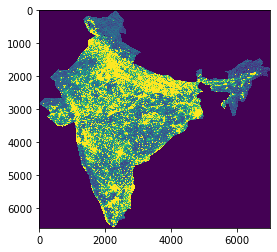

In [36]:
#this is to show output of mask function when plotted using matplotlib's imshow, depicts India
data=json.load(open("india.json"))
geoms=[data['geometry']]

with rasterio.open("SVDNB_npp_20190401-20190430_75N060E_vcmcfg_v10_c201905191000.avg_rade9h.tif") as src:
        out_image,out_transform = rasterio.mask.mask(src, geoms,crop=True)
        
plt.imshow(out_image[0],vmin=0,vmax=1)

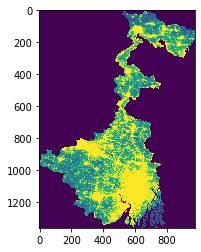

In [28]:
#this is to show output of mask function when plotted using matplotlib's imshow, depicts the given state

datastates=json.load(open("states.json"))
for x in datastates['features']:
        if (x['id']=='West Bengal'):
            a=[x['geometry']]
            
with rasterio.open("SVDNB_npp_20190401-20190430_75N060E_vcmcfg_v10_c201905191000.avg_rade9h.tif") as src:
        out_imageraj,out_transform = rasterio.mask.mask(src, a, all_touched=True, nodata=0.0,crop=True)

        
plt.imshow(out_imageraj[0],vmin=0,vmax=1)